# Модели влияния в сетях

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import clear_output
#import imageio

## Пороговая модель

$$
\sum_{u\in N(v) } A(u) \cdot w(e_{uv}) > h
$$

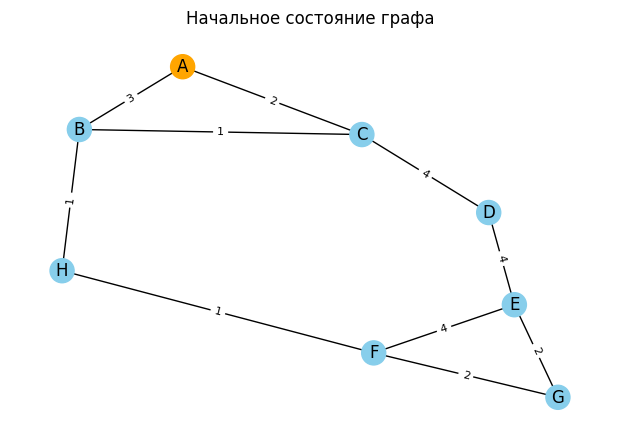

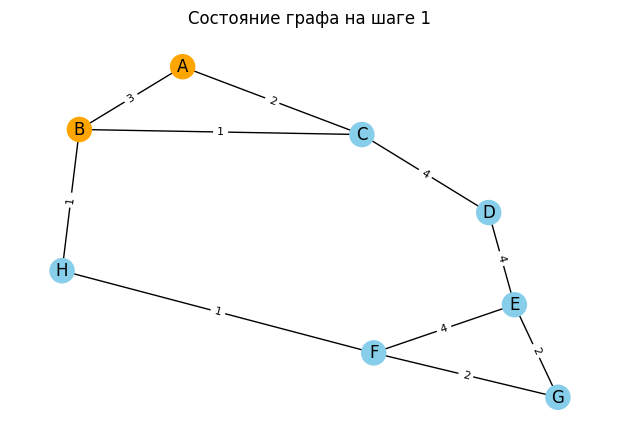

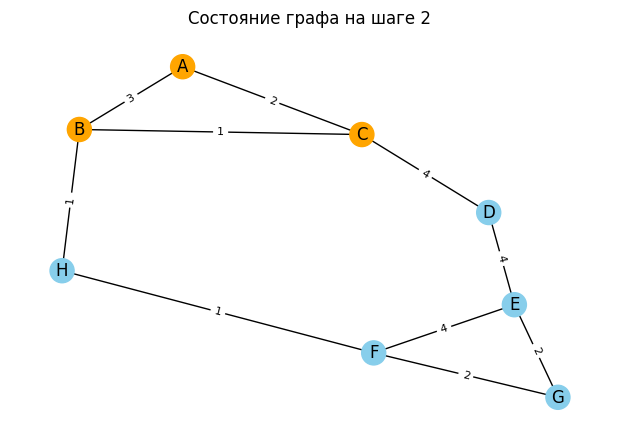

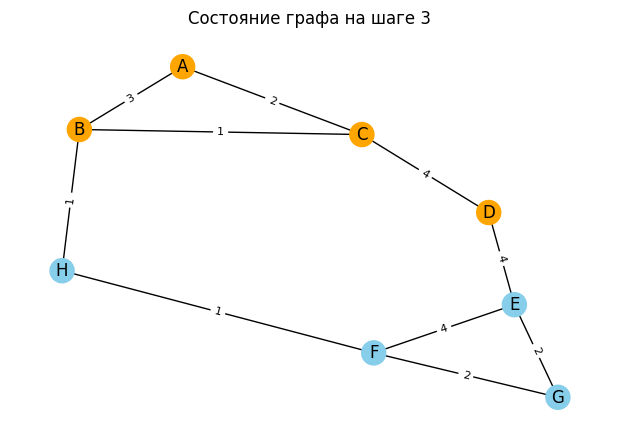

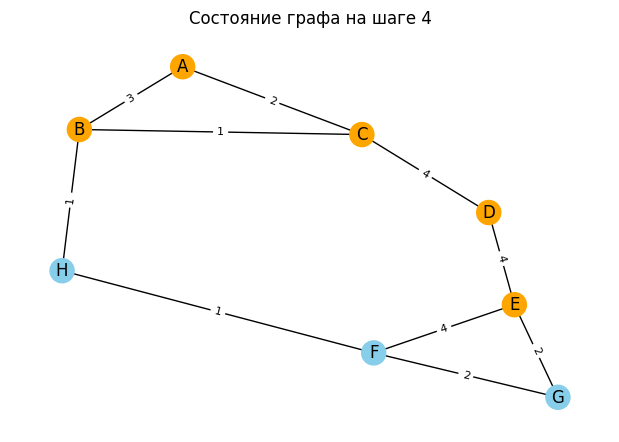

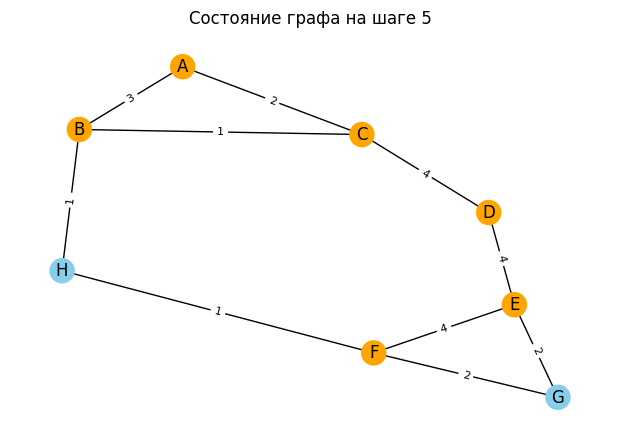

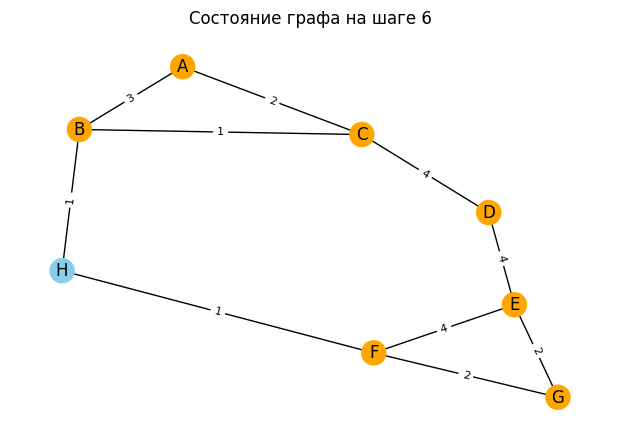

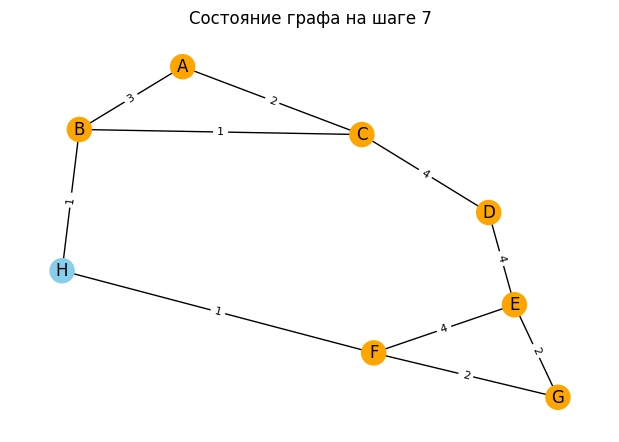

In [2]:
# Функция активации
def activate_vertices(graph, activated, threshold):
    newly_activated = set()
    for v in graph.nodes():
        if v not in activated:
            activation_sum = sum(graph[v][u]['weight'] if 'weight' in graph[v][u] else 1
                                 for u in graph.neighbors(v) if u in activated)
            if activation_sum >= threshold:
                newly_activated.add(v)
    return newly_activated

# Создаем граф
g = nx.Graph()

# Вершины и веса
g.add_edge('A', 'B', weight=3)
g.add_edge('A', 'C', weight=2)
g.add_edge('B', 'C', weight=1)
g.add_edge('C', 'D', weight=4)
g.add_edge('D', 'E', weight=4)
g.add_edge('E', 'F', weight=4)
g.add_edge('F', 'G', weight=2)
g.add_edge('G', 'E', weight=2)
g.add_edge('F', 'H', weight=1)
g.add_edge('H', 'B', weight=1)

# Изначально активированные вершины (изначальное состояние)
activated_vertices = {'A'}

# Порог активации (h)
threshold = 3

# Визуализация начального состояния
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(g)
colors = ['orange' if node in activated_vertices else 'skyblue' for node in g.nodes()]
nx.draw(g, pos, with_labels=True, node_color=colors)
nx.draw_networkx_edge_labels(g, pos, font_size=8, edge_labels=nx.get_edge_attributes(g, "weight"))
plt.title('Начальное состояние графа')
plt.show()

# Симуляция
simulation_steps = 7
for i in range(simulation_steps):
  # Активация вершин на основе пороговой модели
  newly_activated = activate_vertices(g, activated_vertices, threshold)
  # Обновление активированных вершин
  activated_vertices.update(newly_activated)
  # Визуализация
  plt.figure(figsize=(6, 4))
  colors = ['orange' if node in activated_vertices else 'skyblue' for node in g.nodes()]
  nx.draw(g, pos, with_labels=True, node_color=colors)
  nx.draw_networkx_edge_labels(g, pos, font_size=8, edge_labels=nx.get_edge_attributes(g, "weight"))
  plt.title(f'Состояние графа на шаге {i+1}')
  plt.show()

## Модификация пороговой модели

$$
\frac{1}{|N(v)|}\cdot\sum_{u\in N(v) } A(u) \cdot w(e_{uv}) > h
$$

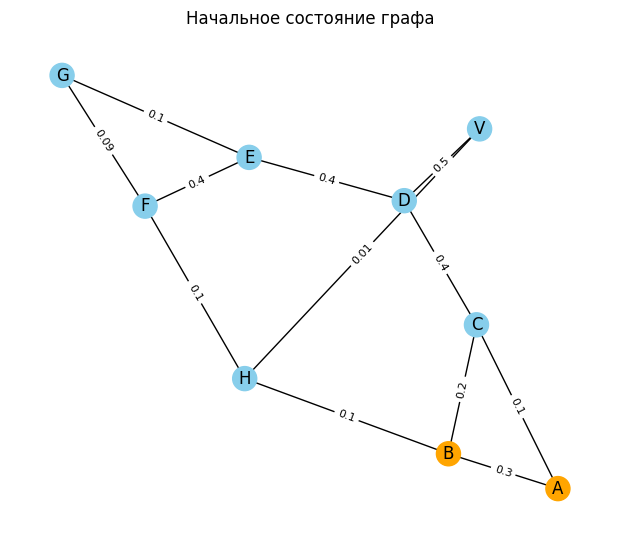

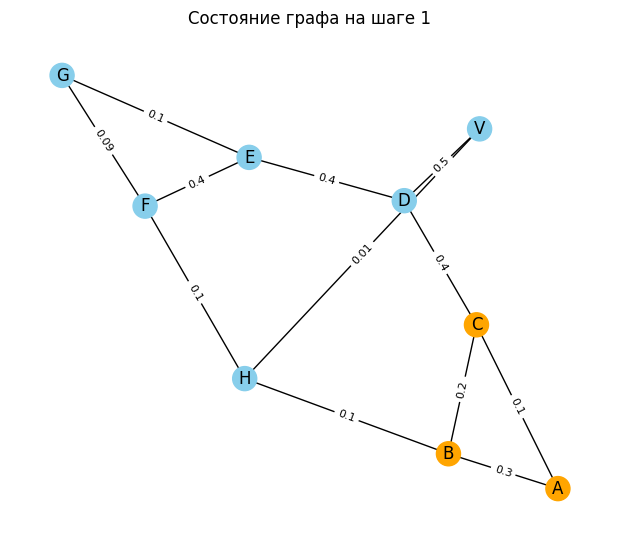

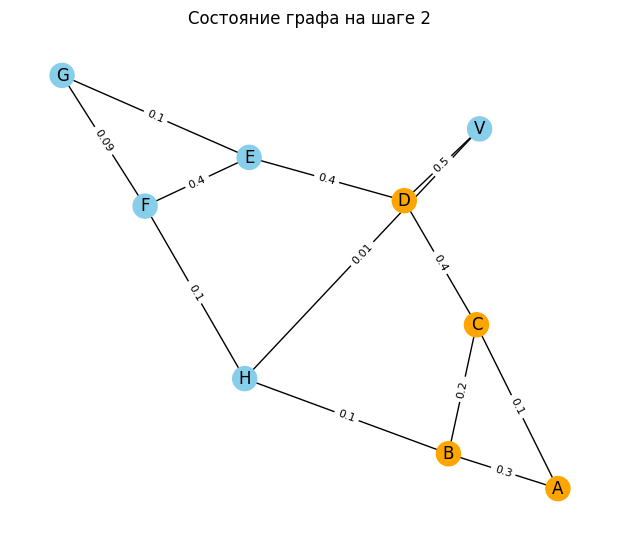

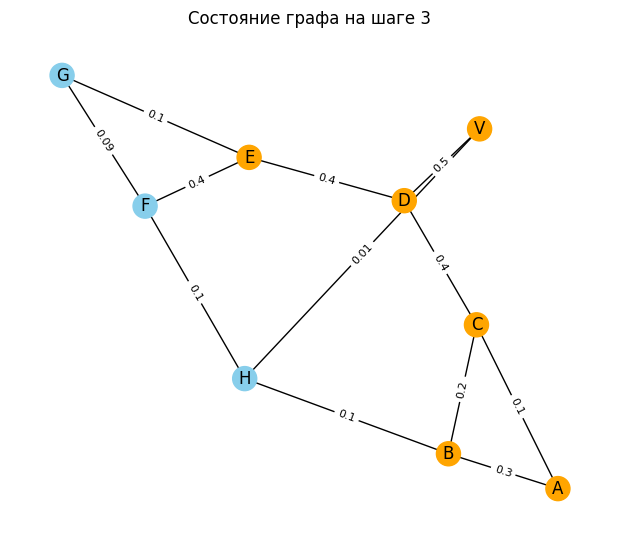

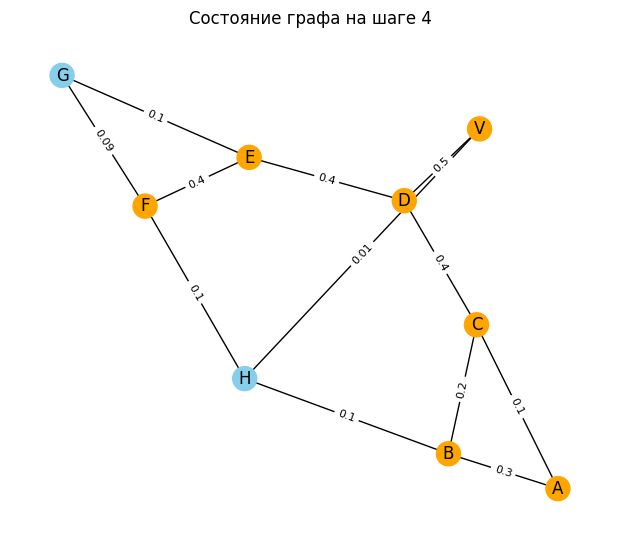

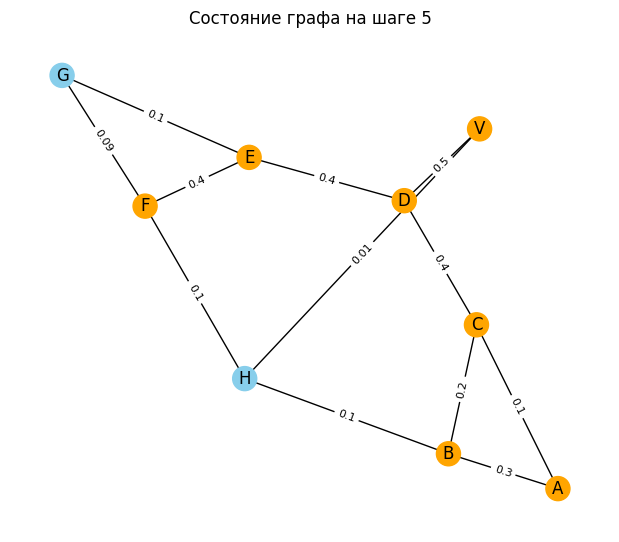

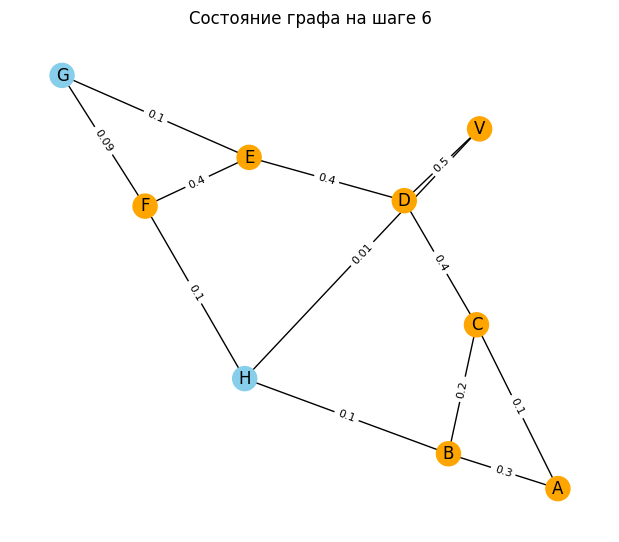

In [7]:
# Функция активации
def activate_vertices(graph, activated, threshold):
    newly_activated = set()
    for v in graph.nodes():
        if v not in activated:
            activation_sum = sum(graph[v][u]['weight'] if 'weight' in graph[v][u] else 1
                                 for u in graph.neighbors(v) if u in activated)
            neighbors_count = len(list(graph.neighbors(v)))
            if neighbors_count == 0:
              continue
            average_activation = activation_sum / neighbors_count
            if average_activation >= threshold:
                newly_activated.add(v)
    return newly_activated

# Создаем граф
g = nx.Graph()

# Добавляем вершины и веса в промежутке [0, 1]
g.add_edge('A', 'B', weight=0.3)
g.add_edge('A', 'C', weight=0.1)
g.add_edge('B', 'C', weight=0.2)
g.add_edge('C', 'D', weight=0.4)
g.add_edge('D', 'E', weight=0.4)
g.add_edge('E', 'F', weight=0.4)
g.add_edge('F', 'G', weight=0.09)
g.add_edge('G', 'E', weight=0.1)
g.add_edge('F', 'H', weight=0.1)
g.add_edge('H', 'B', weight=0.1)
g.add_edge('V', 'D', weight=0.5)
g.add_edge('V', 'H', weight=0.01)

# Изначально активированные вершины (изначальное состояние)
activated_vertices = {'A', 'B'}

# Порог активации (h)
threshold = 0.1

# Визуализация начального состояния
plt.figure(figsize=(6, 5))
pos = nx.spring_layout(g)
colors = ['orange' if node in activated_vertices else 'skyblue' for node in g.nodes()]
nx.draw(g, pos, with_labels=True, node_color=colors)
nx.draw_networkx_edge_labels(g, pos, font_size=8, edge_labels=nx.get_edge_attributes(g, "weight"))
plt.title('Начальное состояние графа')
plt.show()

# Симуляция
simulation_steps = 6
for i in range(simulation_steps):
  # Активация вершин на основе пороговой модели
  newly_activated = activate_vertices(g, activated_vertices, threshold)
  # Обновление активированных вершин
  activated_vertices.update(newly_activated)
  # Визуализация
  plt.figure(figsize=(6, 5))
  colors = ['orange' if node in activated_vertices else 'skyblue' for node in g.nodes()]
  nx.draw(g, pos, with_labels=True, node_color=colors)
  nx.draw_networkx_edge_labels(g, pos, font_size=8, edge_labels=nx.get_edge_attributes(g, "weight"))
  plt.title(f'Состояние графа на шаге {i+1}')
  #plt.savefig(f'{i}.png')
  plt.show()


# images = []
# for i in range(6):
#   images.append(imageio.imread(f'{i}.png'))
# imageio.mimsave('movie.gif', images)
# from IPython.display import Image
# display(Image(url='movie.gif'))

## Вероятностная модель SIS

(susceptible-infected-susceptible = восприимчивый-инфицированный-восприимчивый)

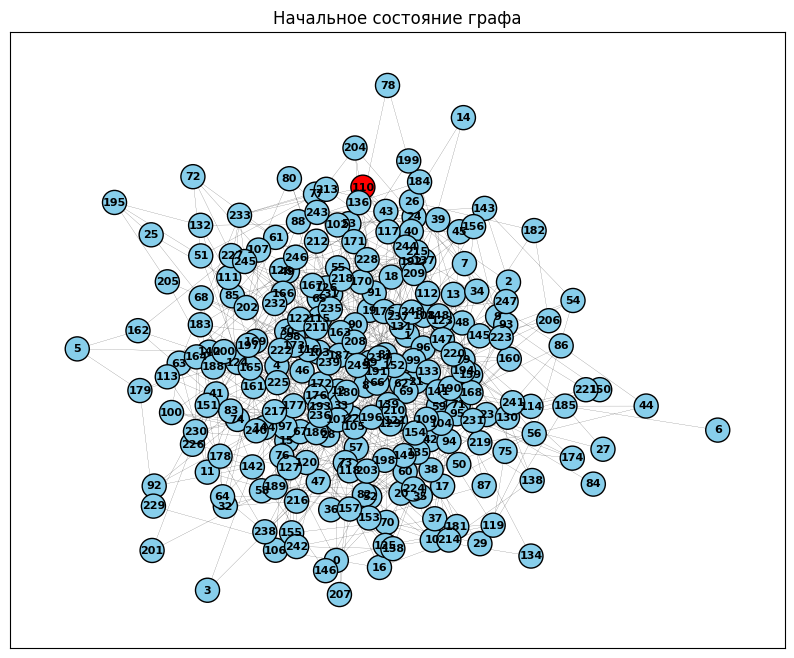

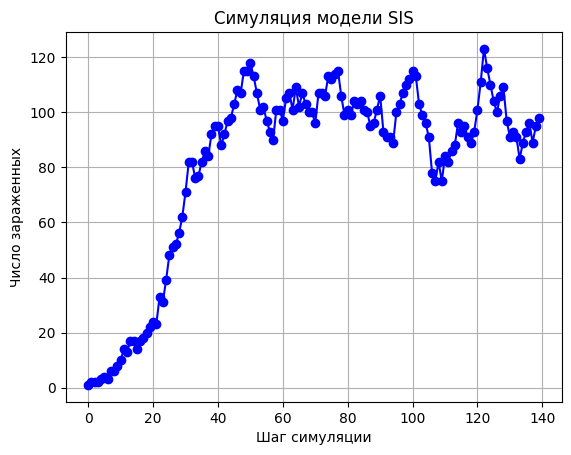

In [33]:
import random

def SIS_model(graph, p, q, initial_infected, iterations):
    infected_nodes = set(initial_infected)
    susceptible_nodes = set(graph.nodes()) - infected_nodes
    infected_count = [] # Число зараженных за итерацию
    for _ in range(iterations):
        newly_infected = set()
        # Процесс заражения
        for node in infected_nodes:
            for neighbor in graph.neighbors(node):
                if neighbor in susceptible_nodes:
                    # Определение вероятности заразиться
                    if random.random() < p:
                        newly_infected.add(neighbor)

        # Процесс восстановления
        for node in infected_nodes.copy():
            # Вероятность восстановиться
            if random.random() < q:
                infected_nodes.remove(node)
                susceptible_nodes.add(node)

        infected_nodes.update(newly_infected)
        infected_count.append(len(infected_nodes))
    return infected_count


# Создаем случайный граф
vertices_count = 250 # Число вершин
p_edge_creation = 0.025 # Вероятность связи
seed = 42 # Сид
g = nx.erdos_renyi_graph(vertices_count, p_edge_creation, seed=seed)

# Начальные параметры
p = 0.068  # Вероятность заразиться
q = 0.27  # Вероятность восстановления
initial_infected = [random.choice(list(g.nodes()))]  # Изначально зараженные вершины
iterations = 140 # Число шагов симуляции

# Визуализация начального состояния
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(g)
colors = ['red' if node in initial_infected else 'skyblue' for node in g.nodes()]
#nx.draw(g, pos, with_labels=True, node_color=colors)
nx.draw_networkx_nodes(g, pos, linewidths=1, edgecolors="black", node_color=colors)
nx.draw_networkx_labels(g, pos, font_size=8, font_color="black", font_weight=600)
nx.draw_networkx_edges(g, pos, width=0.1, edge_color="black")
plt.title('Начальное состояние графа')
plt.show()

# Симуляция
infected_count = SIS_model(g, p, q, initial_infected, iterations)

# Статистика
plt.plot(range(iterations), infected_count, marker='o', linestyle='-', color='b')
plt.title('Симуляция модели SIS')
plt.xlabel('Шаг симуляции')
plt.ylabel('Число зараженных')
plt.grid(True)
plt.show()


Анимация модели SIS

In [ ]:
from matplotlib.animation import FuncAnimation

# Функция для обновления картинки каждый шаг
def update(frame):
    # Шаг симуляции
    susceptible_nodes_in_danger_set = set()
    newly_infected = set()
    for node in infected_nodes:
        for neighbor in g.neighbors(node):
            if neighbor in susceptible_nodes:
                if random.random() < p:
                    newly_infected.add(neighbor)
    for node in infected_nodes.copy():
        if random.random() < q:
            infected_nodes.remove(node)
            susceptible_nodes.add(node)
    infected_nodes.update(newly_infected)
    for node in infected_nodes:
      susceptible_nodes_in_danger_set.update(g.neighbors(node))
    # Графика
    plt.clf()
    colors = ['red' if node in infected_nodes else 'orange' if node in susceptible_nodes_in_danger_set else 'skyblue' for node in g.nodes()]
    nx.draw(g, pos=layout, with_labels=True, node_color=colors)
    nx.draw_networkx_edge_labels(g, pos, font_size=8, edge_labels=nx.get_edge_attributes(g, "weight"))
    plt.title(f'Шаг симуляции: {frame+1}')

g = nx.erdos_renyi_graph(vertices_count, p_edge_creation, seed=seed)
layout = nx.spring_layout(g)
fig, ax = plt.subplots()
number_of_frames = iterations # Число фреймов = шагов симуляции
infected_nodes = set(initial_infected)
susceptible_nodes = set(g.nodes()) - infected_nodes

# Создание анимации. Интервал = скорость смена кадра
ani = FuncAnimation(fig, update, frames=range(number_of_frames), interval=200)
# Сохранение в файл
ani.save('sis_animation.mp4', writer='ffmpeg')
clear_output()

In [35]:
import base64
from pathlib import Path
from IPython import display as ipythondisplay

# Отображение видео
def show_videos(video_path="", prefix=""):
    """
    :param video_path: (str) Путь до папки с видео
    :param prefix: (str) Фильтр файлов, начинающихся только с префикса
    """
    html = []
    for mp4 in Path(video_path).glob("{}*.mp4".format(prefix)):
        video_b64 = base64.b64encode(mp4.read_bytes())
        html.append(
            """<video alt="{}" autoplay
                    loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{}" type="video/mp4" />
                </video>""".format(
                mp4, video_b64.decode("ascii")
            )
        )
    ipythondisplay.display(ipythondisplay.HTML(data="<br>".join(html)))

* Голубые - здоровые и не в опасности
* Оранжевые - здоровые и в опасности
* Красные - зараженные

In [36]:
show_videos("", "sis")

## Вероятностная модель SIR

 (susceptible-infected-resistant = восприимчивый-инфицированныйневосприимчивый)

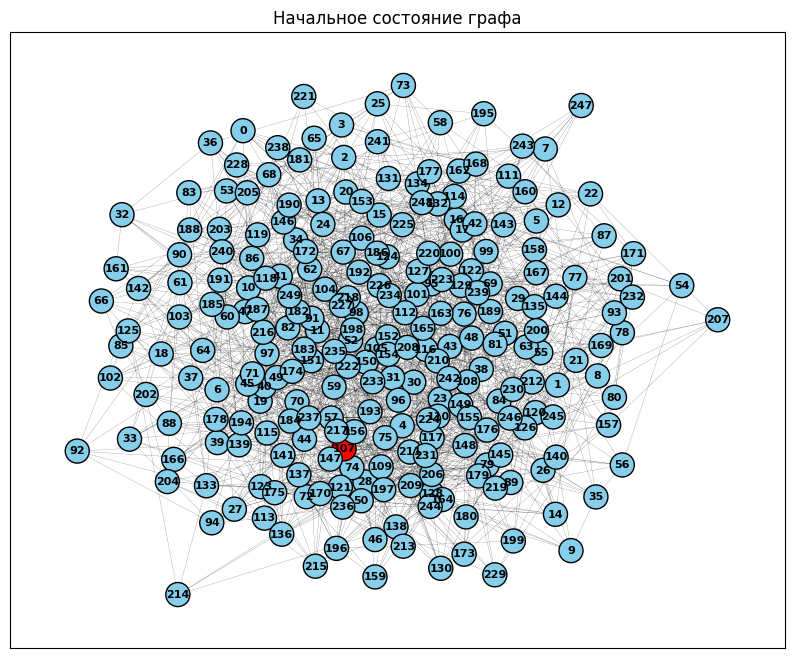

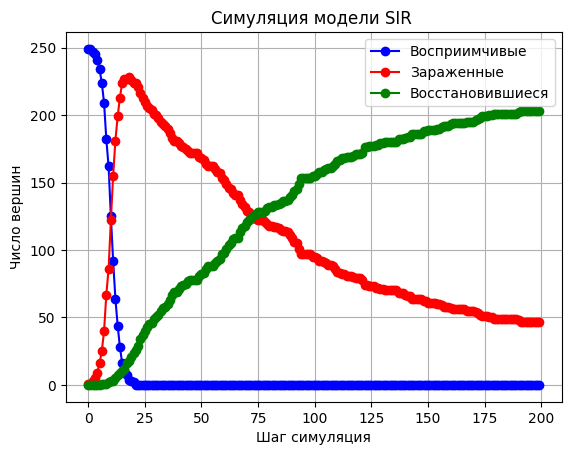

In [47]:
def SIR_model(graph, p, q, initial_infected, iterations):
    infected_nodes = set(initial_infected)
    recovered_nodes = set()
    susceptible_nodes = set(graph.nodes()) - infected_nodes - recovered_nodes

    infected_count = []
    susceptible_count = []
    recovered_count = []

    for _ in range(iterations):
        newly_infected = set()
        newly_recovered = set()

        # Процесс заражения
        for node in infected_nodes:
            for neighbor in graph.neighbors(node):
                if neighbor in recovered_nodes:
                  continue
                if neighbor in susceptible_nodes:
                    # Вероятность заразиться
                    if random.random() < p:
                        newly_infected.add(neighbor)
                        susceptible_nodes.remove(neighbor)

        # Процесс восстновления
        for node in infected_nodes.copy():
            if random.random() < q:
                infected_nodes.remove(node)
                newly_recovered.add(node)

        infected_nodes.update(newly_infected)
        recovered_nodes.update(newly_recovered)
        recovered_count.append(len(recovered_nodes))
        infected_count.append(len(infected_nodes))
        susceptible_count.append(len(susceptible_nodes))

    return susceptible_count, infected_count, recovered_count

# Создаем граф
vertices_count = 250 # Число вершин
p_edge_creation = 0.05 # Вероятность связи
seed = 42 # Сид
g = nx.erdos_renyi_graph(vertices_count, p_edge_creation, seed=seed)

# Set parameters
p = 0.05  # Вероятность заражения
q = 0.01  # Вероятность восстновления
initial_infected = [random.choice(list(g.nodes()))]  # Изначально зараженные вершины
iterations = 200 # Число итераций

# Визуализация начального состояния
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(g)
colors = ['red' if node in initial_infected else 'skyblue' for node in g.nodes()]
#nx.draw(g, pos, with_labels=True, node_color=colors)
nx.draw_networkx_nodes(g, pos, linewidths=1, edgecolors="black", node_color=colors)
nx.draw_networkx_labels(g, pos, font_size=8, font_color="black", font_weight=600)
nx.draw_networkx_edges(g, pos, width=0.1, edge_color="black")
plt.title('Начальное состояние графа')
plt.show()

# Симуляция
susceptible_count, infected_count, recovered_count = SIR_model(g, p, q, initial_infected, iterations)

# Визуализация
plt.plot(range(iterations), susceptible_count, marker='o', linestyle='-', color='b', label='Восприимчивые')
plt.plot(range(iterations), infected_count, marker='o', linestyle='-', color='r', label='Зараженные')
plt.plot(range(iterations), recovered_count, marker='o', linestyle='-', color='g', label='Восстановившиеся')
plt.title('Симуляция модели SIR ')
plt.xlabel('Шаг симуляция')
plt.ylabel('Число вершин')
plt.legend()
plt.grid(True)
plt.show()


Aнимация модели SIR

In [ ]:
# Функция для обновления картинки каждый шаг
def update(frame):
    # Шаг симуляции
    newly_infected = set()
    newly_recovered = set()
    # Процесс заражения
    for node in infected_nodes:
        for neighbor in g.neighbors(node):
            if neighbor in recovered_nodes:
              continue
            if neighbor in susceptible_nodes:
                # Вероятность заразиться
                if random.random() < p:
                    newly_infected.add(neighbor)
    # Процесс восстновления
    for node in infected_nodes.copy():
        if random.random() < q:
            infected_nodes.remove(node)
            newly_recovered.add(node)

    infected_nodes.update(newly_infected)
    recovered_nodes.update(newly_recovered)
    # Графика
    plt.clf()
    colors = ['red' if node in infected_nodes else 'green' if node in recovered_nodes else'skyblue' for node in g.nodes()]
    nx.draw(g, pos=layout, with_labels=True, node_color=colors)
    nx.draw_networkx_edge_labels(g, pos, font_size=8, edge_labels=nx.get_edge_attributes(g, "weight"))
    plt.title(f'Шаг симуляции: {frame+1}')

g = nx.erdos_renyi_graph(vertices_count, p_edge_creation, seed=seed)
layout = nx.spring_layout(g)
fig, ax = plt.subplots()
number_of_frames = iterations # Число фреймов = шагов симуляции
infected_nodes = set(initial_infected)
susceptible_nodes = set(g.nodes()) - infected_nodes
recovered_nodes = set()

# Создание анимации. Интервал = скорость смена кадра
ani = FuncAnimation(fig, update, frames=range(number_of_frames), interval=200)
# Сохранение в файл
ani.save('sir_o_animation.mp4', writer='ffmpeg')
clear_output()

* Голубые - здоровые
* Зеленые - невосприимчивые
* Красные - зараженные

In [40]:
show_videos("", "sir_o")

## Модификация SIR

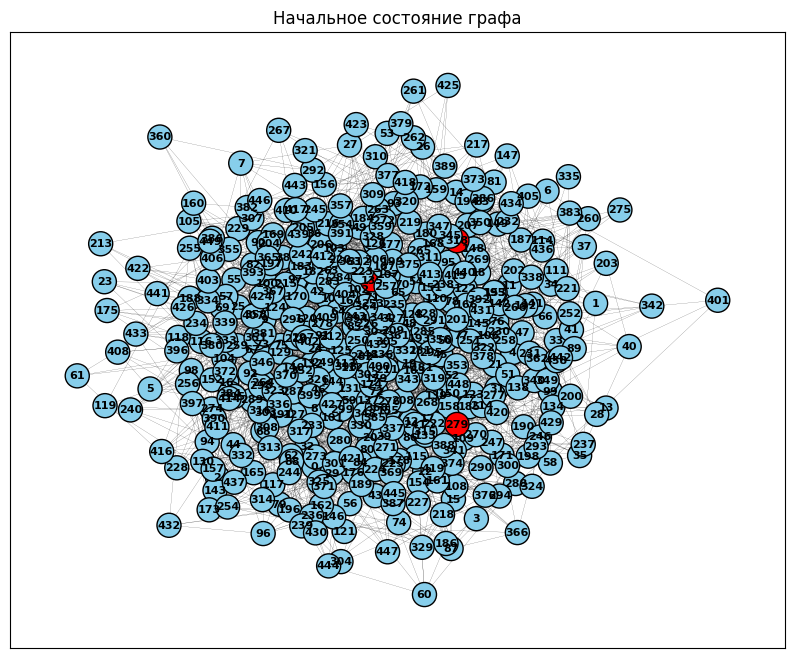

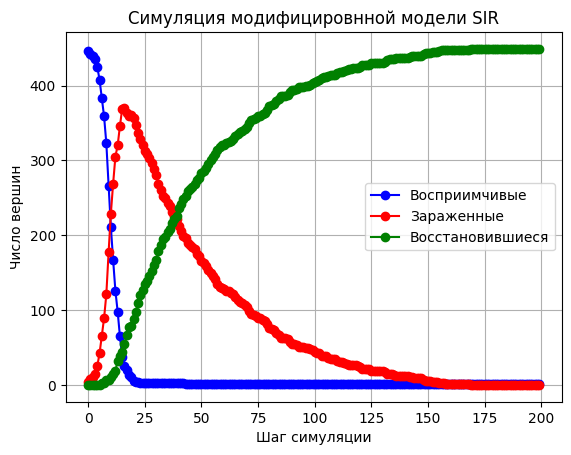

In [54]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def modified_SIR_model(graph, p, q, r, initial_infected, iterations):
    infected_nodes = set(initial_infected)
    susceptible_nodes = set(graph.nodes()) - infected_nodes
    recovered_nodes = set()

    infected_count = []
    susceptible_count = []
    recovered_count = []

    for _ in range(iterations):
        newly_infected = set()

        # Если восприимчивый человек встречается с инфицированным, то оба становятся инфицированными.
        for node in infected_nodes:
            for neighbor in graph.neighbors(node):
                if neighbor in susceptible_nodes.copy():
                    # Процесс заражения
                    if random.random() < p:
                        newly_infected.add(neighbor)
                        susceptible_nodes.remove(neighbor)

        # Если инфицированный встречается с невосприимчивым, то оба становятся невосприимчивыми.
        for node in infected_nodes.copy():
            for neighbor in graph.neighbors(node):
                if neighbor in recovered_nodes:
                    # Зараженный -> Невосприимвичвый
                    if random.random() < r:
                        recovered_nodes.add(node)
                        infected_nodes.remove(node)
                        break
            break

        # Eсли встречаются два инфицированных, то они оба становятся невосприимчивыми.
        for node in infected_nodes.copy():
          for neighbor in graph.neighbors(node):
              if neighbor in infected_nodes.copy():
                  # Зараженный -> Невосприимвичвый
                  if random.random() < r:
                      recovered_nodes.add(node)
                      infected_nodes.remove(node)
                      recovered_nodes.add(neighbor)
                      infected_nodes.remove(neighbor)
                      break
          break

        # Процесс восстновления
        for node in infected_nodes.copy():
            if random.random() < q:
                infected_nodes.remove(node)
                recovered_nodes.add(node)

        infected_nodes.update(newly_infected)
        recovered_count.append(len(recovered_nodes))
        infected_count.append(len(infected_nodes))
        susceptible_count.append(len(susceptible_nodes))

    return susceptible_count, infected_count, recovered_count

# Граф
vertices_count = 450 # Число вершин
p_edge_creation = 0.025 # Вероятность связи
seed = 42 # Сид
g = nx.erdos_renyi_graph(vertices_count, p_edge_creation, seed=seed)

# Параметры симуляции
p = 0.05  # Вероятность заразиться
q = 0.025  # Вероятность восстановиться
r = 1e-2  # Вероятность восстановления зараженного от невосприимввого
k = 1e-4  # Вероятность восстановления зараженного от зараженного
initial_infected = [random.choice(list(g.nodes())), random.choice(list(g.nodes())), random.choice(list(g.nodes()))]  # Initial infected nodes
iterations = 200

# Визуализация начального состояния
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(g)
colors = ['red' if node in initial_infected else 'skyblue' for node in g.nodes()]
#nx.draw(g, pos, with_labels=True, node_color=colors)
nx.draw_networkx_nodes(g, pos, linewidths=1, edgecolors="black", node_color=colors)
nx.draw_networkx_labels(g, pos, font_size=8, font_color="black", font_weight=600)
nx.draw_networkx_edges(g, pos, width=0.1, edge_color="black")
plt.title('Начальное состояние графа')
plt.show()

# Симуляция
susceptible_count, infected_count, recovered_count = modified_SIR_model(g, p, q, r, initial_infected, iterations)

# График
plt.plot(range(iterations), susceptible_count, marker='o', linestyle='-', color='b', label='Восприимчивые')
plt.plot(range(iterations), infected_count, marker='o', linestyle='-', color='r', label='Зараженные')
plt.plot(range(iterations), recovered_count, marker='o', linestyle='-', color='g', label='Восстановившиеся')
plt.title('Симуляция модифицировнной модели SIR')
plt.xlabel('Шаг симуляции')
plt.ylabel('Число вершин')
plt.legend()
plt.grid(True)
plt.show()


Анимация модификации SIR

In [ ]:
# Функция для обновления картинки каждый шаг
def update(frame):
    # Шаг симуляции
    newly_infected = set()
    # Если восприимчивый человек встречается с инфицированным, то оба становятся инфицированными.
    for node in infected_nodes:
        for neighbor in g.neighbors(node):
            if neighbor in susceptible_nodes.copy():
                # Процесс заражения
                if random.random() < p:
                    newly_infected.add(neighbor)
                    susceptible_nodes.remove(neighbor)
    # Если инфицированный встречается с невосприимчивым, то оба становятся невосприимчивыми.
    for node in infected_nodes.copy():
        for neighbor in g.neighbors(node):
            if neighbor in recovered_nodes:
                # Зараженный -> Невосприимвичвый
                if random.random() < r:
                    recovered_nodes.add(node)
                    infected_nodes.remove(node)
                    break
        break
    # Eсли встречаются два инфицированных, то они оба становятся невосприимчивыми.
    for node in infected_nodes.copy():
      for neighbor in g.neighbors(node):
          if neighbor in infected_nodes.copy():
              # Зараженный -> Невосприимвичвый
              if random.random() < r:
                  recovered_nodes.add(node)
                  infected_nodes.remove(node)
                  recovered_nodes.add(neighbor)
                  infected_nodes.remove(neighbor)
                  break
      break
    # Процесс восстновления
    for node in infected_nodes.copy():
        if random.random() < q:
            infected_nodes.remove(node)
            recovered_nodes.add(node)
    infected_nodes.update(newly_infected)
    # Графика
    plt.clf()
    colors = ['red' if node in infected_nodes else 'green' if node in recovered_nodes else'skyblue' for node in g.nodes()]
    nx.draw(g, pos=layout, with_labels=True, node_color=colors)
    nx.draw_networkx_edge_labels(g, pos, font_size=8, edge_labels=nx.get_edge_attributes(g, "weight"))
    plt.title(f'Шаг симуляции: {frame+1}')

g = nx.erdos_renyi_graph(vertices_count, p_edge_creation, seed=seed)
layout = nx.spring_layout(g)
fig, ax = plt.subplots()
number_of_frames = iterations # Число фреймов = шагов симуляции
infected_nodes = set(initial_infected)
susceptible_nodes = set(g.nodes()) - infected_nodes
recovered_nodes = set()

# Создание анимации. Интервал = скорость смена кадра
ani = FuncAnimation(fig, update, frames=range(number_of_frames), interval=200)
# Сохранение в файл
ani.save('sir_m_animation.mp4', writer='ffmpeg')

* Голубые - здоровые
* Зеленые - невосприимчивые
* Красные - зараженные

In [56]:
show_videos("", "sir_m")